# Movie  Analysis Project

## Introduction

This project aims to analyze movie data from various sources to provide data-driven insights for a company launching a new movie studio. The goal is to identify the types of films that are most likely to perform well at the box office. This analysis will help the company decide what kind of movies to create.

## Business Problem

Our company is venturing into the creation of original video content, specifically a new movie studio. However, the company lacks experience in the movie production industry. Therefore, this analysis will be a data-driven exploration into what types of films are currently achieving success at the box office and translating that into actionable recommendations for the new studio.

## Data Sources

The following datasets are used in this analysis:

*   `bom.movie_gross.csv`: Box office gross revenue data from Box Office Mojo.
*   `tn.movie_budgets.csv`: Movie budget data from The Numbers.
*   `tmdb.movies.csv`: Movie metadata (including genres, cast, and release date) from The Movie Database (TMDB).
*   `rt.movie_info.tsv`: Movie information and ratings from Rotten Tomatoes.
*   `rt.reviews.tsv`: Movie reviews from Rotten Tomatoes.
*  `im.db`: Movie information and ratings from the IMDB database

## Analysis Focus
This analysis will focus on addressing these key questions:

1.  **Financial Performance:**
    - Which genres are currently the most financially successful (highest revenue and profit)?
    - What is the average return on investment (ROI) for different genres?
    - Does a higher budget guarantee higher revenue?
    - What is the relationship between production budget and box office gross?
    - Are there budget levels that yield the best return for specific genres?
    - Which months are better for launching a movie? Do certain types of movies do better in specific months?

2.  **Popularity:**
    - Which genres are most popular among audiences (based on popularity metrics)?
    - What is the correlation between popularity and financial success?

3.  **Critical Acclaim & Audience Sentiment:**
    - Which genres tend to receive the highest critical ratings and positive reviews?
    - Is there a correlation between audience sentiment (from review text) and financial success?
    - How do ratings differ between Rotten Tomatoes, TMDB, or any other rating source?
    - Are there any inconsistencies across ratings?
    - Are there some movies that are more polarizing than others (have widely different reviews)?

4.  **Influence of Key Personnel:**
    - Which directors or actors are associated with high-grossing movies?
    - Are there some directors or actors that are strongly associated with one genre?
    - Are there any common collaborations between directors and actors in high-performing films?


The goal is to provide data-driven recommendations regarding which types of movies the new studio should prioritize, taking into consideration the financial performance, the popularity of those movies, and also taking into consideration the talent involved.

In [614]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [615]:
# Load the data
df_bom = pd.read_csv('Data/bom.movie_gross.csv')
df_tn = pd.read_csv('Data/tn.movie_budgets.csv')
df_tmdb = pd.read_csv('Data/tmdb.movies.csv')
df_rt_info = pd.read_table('Data/rt.movie_info.tsv')
df_rt_reviews = pd.read_table('Data/rt.reviews.tsv', encoding = 'latin-1')

In [616]:
conn = sqlite3.connect('Data/im.db')
cursor = conn.cursor()

## Getting General overview of our datasets

In [617]:
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [618]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


For most columns they have relatively well populated except foreign_gross. The foreign_gross column is object type we will have to convert it into float64.

In [619]:
df_bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


The numbers for the money movie are extremely huge for us to make meaning of the statistical measure. we might consider rounding them off to the nearest million.

In [620]:
df_bom['studio'].unique()

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Wein.', 'Sony',
       'FoxS', 'SGem', 'WB (NL)', 'LGF', 'MBox', 'CL', 'W/Dim.', 'CBS',
       'Focus', 'MGM', 'Over.', 'Mira.', 'IFC', 'CJ', 'NM', 'SPC', 'ParV',
       'Gold.', 'JS', 'RAtt.', 'Magn.', 'Free', '3D', 'UTV', 'Rela.',
       'Zeit.', 'Anch.', 'PDA', 'Lorb.', 'App.', 'Drft.', 'Osci.', 'IW',
       'Rog.', nan, 'Eros', 'Relbig.', 'Viv.', 'Hann.', 'Strand', 'NGE',
       'Scre.', 'Kino', 'Abr.', 'CZ', 'ATO', 'First', 'GK', 'FInd.',
       'NFC', 'TFC', 'Pala.', 'Imag.', 'NAV', 'Arth.', 'CLS', 'Mont.',
       'Olive', 'CGld', 'FOAK', 'IVP', 'Yash', 'ICir', 'FM', 'Vita.',
       'WOW', 'Truly', 'Indic.', 'FD', 'Vari.', 'TriS', 'ORF', 'IM',
       'Elev.', 'Cohen', 'NeoC', 'Jan.', 'MNE', 'Trib.', 'Rocket',
       'OMNI/FSR', 'KKM', 'Argo.', 'SMod', 'Libre', 'FRun', 'WHE', 'P4',
       'KC', 'SD', 'AM', 'MPFT', 'Icar.', 'AGF', 'A23', 'Da.', 'NYer',
       'Rialto', 'DF', 'KL', 'ALP', 'LG/S', 'WGUSA', 'MPI', 'RTWC', 'FIP

In [621]:
df_bom['studio'].unique().size

258

Studio will have to given full name where it is abbreviate to make it easier to understand.

In [622]:
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [623]:
df_tn['id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [624]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The dataset from the numbers doesn't have any null value that we can see so far. It has the issue of wrong data types for release_date, Production_Budget, Domestic_gross and Worldwide_gross columns and they will have to be convert to correct type.

In [625]:
df_tn.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


Describe function is result that much because the numberic columns are in object type but even the we have seen the number we are dealing with are extremely big so we are deciding to we go with the same route as the other dataset and then will inspect further.

In [626]:
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [627]:
# Selecting those with higher vote count of at least 100
df_tmdb_filtered = df_tmdb[df_tmdb['vote_count'] > 100]
df_tmdb_filtered.shape

(3669, 10)

In [628]:
df_tmdb['original_language'].value_counts()

original_language
en    23291
fr      507
es      455
ru      298
ja      265
      ...  
bo        1
si        1
sl        1
hz        1
dz        1
Name: count, Length: 76, dtype: int64

We can observe id column. These are ids given to the movies might come in handy if other dataset label movies with the same kind of ids.

In [629]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [630]:
df_tmdb_filtered['original_language'].unique()

array(['en', 'es', 'ja', 'sv', 'de', 'fr', 'cn', 'it', 'hi', 'zh', 'ko',
       'no', 'fi', 'sr', 'da', 'pt', 'uk', 'fa', 'nb', 'hu', 'nl', 'th',
       'pl', 'id', 'ta', 'et', 'ar', 'he', 'ru', 'tr', 'te', 'is', 'ro'],
      dtype=object)

The dataset from the movies database is way more robust compared to the ones we have seen so far. It has no null values. for most of the columns they are of the correct data types, except release date. 
genre_ids will require abit of work as well since we have the IDs we will want to map those IDs to their corresponding genre names so that it will more readable and understandable.

In [631]:
df_tmdb.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


The popularity column might be skewed likely to the right, We can come that conclusion based on the values of the mean and the median. in our case the mean is quite higher. There are outliers and our max value is one of them. We are going to plot to be sure.

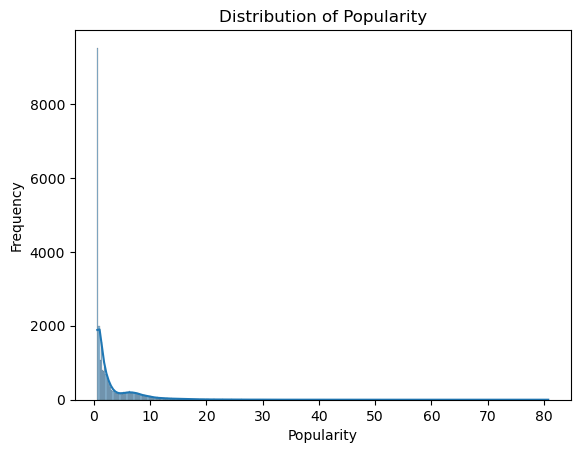

In [632]:
# Plotting the distribution of popularity column 

sns.histplot(df_tmdb['popularity'], kde=True) 
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


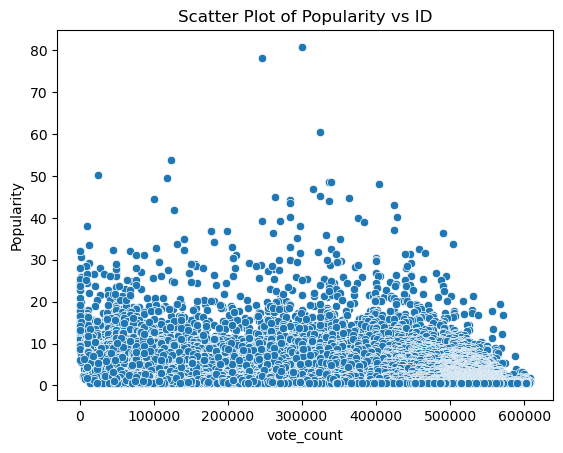

In [633]:
# Create a scatter plot of popularity column

sns.scatterplot(x=df_tmdb['id'], y=df_tmdb['popularity'])
plt.title('Scatter Plot of Popularity vs ID')
plt.xlabel('vote_count')
plt.ylabel('Popularity')
plt.show()

<Axes: ylabel='popularity'>

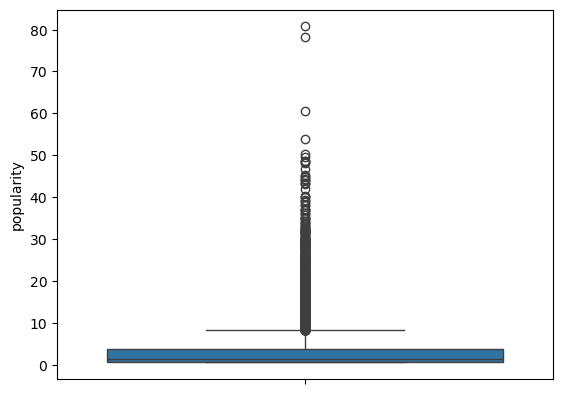

In [634]:
# Check the boxplot
sns.boxplot(df_tmdb['popularity'])

In [635]:
df_rt_info.head(15)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [636]:
df_rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


The is quite a number of missing values. It doesn't have movie name column entirely. There are data type error in theater_data and dvd_data to datetime type, currency and box_office to integer and runtime to timedelta type.

we might be able to find some value from Box Office Mojo for box_office and studio column but we will have to find reliable relation to merge by.

In [637]:
df_rt_info['id'].unique().size

1560

Since the Rotten Tomatoes dataset had exist id column that is uniqu and has no null values, we will use it as the index

In [638]:
# df_rt_info.set_index('id', inplace =True)
df_rt_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [639]:
df_rt_info['currency'].unique()

array([nan, '$'], dtype=object)

In [640]:
df_rt_info.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [641]:
df_rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


For critic privacy we will propaply get rid of publisher.

In [642]:
df_rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


We observe some there is higher number of record that have review compared to rating. this could mean there are record with review but no retting, but that statement False or partialy true. We will validate and deal with them accordingly.

In [643]:
df_rt_reviews.loc[df_rt_reviews['top_critic']==1]

,id,review,rating,fresh,critic,top_critic,publisher,date
24,3,"The rapid dialogue is dry and mannered, like a...",2.5/4,rotten,Joe Williams,1,St. Louis Post-Dispatch,"September 6, 2012"
47,3,It feels like each and every moment bursts for...,2/4,rotten,Stephanie Merry,1,Washington Post,"August 24, 2012"
50,3,"There's not really a movie there, nothing that...",2/4,rotten,Mick LaSalle,1,San Francisco Chronicle,"August 23, 2012"
54,3,The film is all too faithful to its un-cinemat...,1.5/4,rotten,Colin Covert,1,Minneapolis Star Tribune,"August 23, 2012"
55,3,"Cosmopolis,"" because of its allegiance to the ...",2/4,rotten,Moira MacDonald,1,Seattle Times,"August 23, 2012"
...,...,...,...,...,...,...,...,...
54419,2000,"Sleek, shallow, but frequently amusing.",2.5/4,fresh,Gene Seymour,1,Newsday,"September 27, 2002"
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,fresh,Megan Turner,1,New York Post,"September 27, 2002"
54424,2000,Dawdles and drags when it should pop; it doesn...,1.5/5,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002"
54426,2000,The film lapses too often into sugary sentimen...,NaN,rotten,Paul Malcolm,1,L.A. Weekly,"September 26, 2002"


Of all the critics that left review, we have 13096 record of reviews left by top critics and We might decide to hear the voice of top critic only

In [644]:
df_rt_reviews.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


Describe method does yield much information because ratting which is the column we are interested for statistical measures is in object type. we will have rectify as well.

In [645]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [row[0] for row in cursor.fetchall()]
tables

['movie_basics',
 'directors',
 'known_for',
 'movie_akas',
 'movie_ratings',
 'persons',
 'principals',
 'writers']

In [646]:
for table in tables:
    print(f"Table: {table}")
    df = pd.read_sql(f"SELECT * FROM {table};", conn)
    df.info()
    print("\n" + "="*40 + "\n")

Table: movie_basics
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Table: directors
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


Table: known_for
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data

### We will do the following for the columns in tables:  
Attributes (in the movie_akas table) - Drop the entire column, because there are far too many missing values, therefore irredeemable.  
Languages (in the movie_akas table) - Filling the null values with 'unknown'.  
In the persons table, we will drop all records with death year values, then drop the death-year column.
We also will drop the rows with null values in the professional column.  
We will engineer age as a feature in the persons table.  
We will drop the columns job and characters from the principals table.  

In [647]:
df_movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
df_movie_basics.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [648]:
df_movie_akas = pd.read_sql("SELECT * FROM movie_akas;", conn)
df_movie_akas.head(10)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
5,tt0369610,15,Jurassic World,GR,None,imdbDisplay,None,0.0
6,tt0369610,16,Jurassic World,IT,None,imdbDisplay,None,0.0
7,tt0369610,17,Jurski svijet,HR,None,imdbDisplay,None,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,None,imdbDisplay,None,0.0


In [649]:
df_movie_akas['is_original_title'].value_counts()

is_original_title
0.0    286978
1.0     44700
Name: count, dtype: int64

In [650]:
df_movie_akas['title'].value_counts()

title
Robin Hood              32
Home                    30
Alone                   27
Broken                  25
Thor                    25
                        ..
Igra                     1
Gra                      1
To paihnidi              1
Play - Nur ein Spiel     1
The Attention            1
Name: count, Length: 252781, dtype: int64

In [651]:
df_movie_akas['ordering'].describe()

count    331703.000000
mean          5.125872
std           6.706664
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max          61.000000
Name: ordering, dtype: float64

In [652]:
df_movie_akas['movie_id'].nunique()

122302

We might drop the entire movie_akas table.

In [653]:
df_movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
df_movie_ratings.head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [654]:
df_movie_ratings['numvotes'].describe()

count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

We now get records where the number of votes is more than 100

In [655]:
# Getting only records where the votes are above 100
df_movie_ratings_filtered = df_movie_ratings[df_movie_ratings['numvotes'] > 100]
df_movie_ratings_filtered.shape

(28648, 3)

In [656]:
df_movie_ratings_filtered['movie_id'].nunique()

28648

In [657]:
df_principals = pd.read_sql("SELECT * FROM principals;", conn)
df_principals.head(10)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,None,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,None,None
9,tt0323808,6,nm0811056,producer,producer,None


In [658]:
df_principals['ordering'].unique()

array([ 1,  2,  3, 10,  4,  5,  6,  7,  8,  9], dtype=int64)

In [659]:
df_principals.shape

(1028186, 6)

The 'df_movie_ratings_filtered' is now clean and can be used.

From the above:  


**VERDICT AS FAR MERGING DATASETS IS CONCERNED:** IT WILL BE VIRTUALLY IMPOSSIBLE AND OUR BEST COURSE OF ACTION IS TO WORK ON THE DATASETS SEPARATELY 

In [660]:
# conn.close()

## **Data Cleaning**

### **THE BOX OFFICE MOJO DATASET CLEANING STEPS**

We are going to begin our cleaning with the The Box Office Mojo. 

The following are the Action we are going to take:

**1. Fill the null values in foreign gross column with zero**
 - The rationale for this is we are going with the assumption that the movies that don't have foreign gross have not been sold internationally 

**2. Drop null values in domestic and studio.**
 - They are few as a result the deletion has no impact on our analysis.
 
**3. Feature Engineer: Create Worldwide gross.**
 - We will do this by adding domestic and foreign gross. 
 
**4. Feature Engineer: create studio names**
 - We will match studio name abbreation to their corresponding studio names.
 
**5. We round off our currency columns to the nearest million**
 - This is to make our data more readable and easier to work with.
 
**6. We are going to filter our dataset.**
   - We will use worldwide gross to remove movies that made less than a million
   
**7. Standadization.**
   - Title column in title format

In [661]:
# Before cleaning
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [662]:

df_bom['foreign_gross'].fillna(0, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_21704\1160646358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bom['foreign_gross'].fillna(0, inplace=True)


In [663]:
df_bom.dropna(subset=['domestic_gross', 'studio'], inplace=True)

In [664]:
df_bom['foreign_gross'] = df_bom['foreign_gross'].replace(',', '', regex=True).astype(float)

In [665]:
df_bom['worldwide_gross'] = df_bom['domestic_gross'] + df_bom['foreign_gross']

In [666]:
studio_map = {
    'BV': 'Buena Vista',
    'WB': 'Warner Bros.',
    'P/DW': 'Paramount/DreamWorks',
    'Sum.': 'Summit Entertainment',
    'Par.': 'Paramount Pictures',
    'Uni.': 'Universal Pictures',
    'Fox': '20th Century Fox',
    'Wein.': 'The Weinstein Company',
    'Sony': 'Sony Pictures',
    'FoxS': 'Fox Searchlight Pictures',
    'SGem': 'Screen Gems',
    'WB (NL)': 'Warner Bros. (New Line Cinema)',
    'LGF': 'Lionsgate Films',
    'MBox': 'Movie Box',
    'CL': 'Columbia Pictures',
    'W/Dim.': 'Walt Disney/Dimension Films',
    'CBS': 'CBS Films',
    'Focus': 'Focus Features',
    'MGM': 'Metro-Goldwyn-Mayer',
    'Over.': 'Overture Films',
    'Mira.': 'Miramax Films',
    'IFC': 'IFC Films',
    'CJ': 'CJ Entertainment',
    'NM': 'Newmarket Films',
    'SPC': 'Sony Pictures Classics',
    'ParV': 'Paramount Vantage',
    'Gold.': 'Goldwyn Films',
    'JS': 'Jerry Seinfeld Productions',
    'RAtt.': 'Roadside Attractions',
    'Magn.': 'Magnolia Pictures',
    'Free': 'Freestyle Releasing',
    '3D': '3D Entertainment',
    'UTV': 'UTV Motion Pictures',
    'Rela.': 'Relativity Media',
    'Zeit.': 'Zeitgeist Films',
    'Anch.': 'Anchor Bay Entertainment',
    'PDA': 'Picturehouse',
    'Lorb.': 'Lorber Films',
    'App.': 'Apparition',
    'Drft.': 'DraftHouse Films',
    'Osci.': 'Oscilloscope Laboratories',
    'IW': 'IndieWire Films',
    'Rog.': 'Rogue Pictures',
    'Eros': 'Eros International',
    'Relbig.': 'Reliance Big Entertainment',
    'Viv.': 'Vivendi Entertainment',
    'Hann.': 'Hannover House',
    'Strand': 'Strand Releasing',
    'NGE': 'Next Generation Entertainment',
    'Scre.': 'Screen Media Films',
    'Kino': 'Kino Lorber',
    'Abr.': 'Abramorama',
    'CZ': 'Czech Films',
    'ATO': 'ATO Pictures',
    'First': 'First Look Pictures',
    'GK': 'GK Films',
    'FInd.': 'Film Independent',
    'NFC': 'National Film Corporation',
    'TFC': 'The Film Collaborative',
    'Pala.': 'Paladin Films',
    'Imag.': 'Imagine Entertainment',
    'NAV': 'Navarre Corporation',
    'Arth.': 'Art House Films',
    'CLS': 'Classic Films',
    'Mont.': 'Montreal Films',
    'Olive': 'Olive Films',
    'CGld': 'Cineguild',
    'FOAK': 'Film on Air Kids',
    'IVP': 'Independent Video Producers',
    'Yash': 'Yash Raj Films',
    'ICir': 'International Circuit',
    'FM': 'Film Movement',
    'Vita.': 'Vitascope',
    'WOW': 'World of Wonder',
    'Truly': 'Truly Indie',
}


In [667]:
df_bom['studio_name'] = df_bom['studio'].map(studio_map).fillna('Unknown')

In [668]:
df_bom[['domestic_gross', 'foreign_gross', 'worldwide_gross']] /= 1e6

In [669]:
df_bom = df_bom[df_bom['worldwide_gross'] >= 1]

In [670]:
df_bom['title'] = df_bom['title'].str.title()

C:\Users\hp\AppData\Local\Temp\ipykernel_21704\2858481086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bom['title'] = df_bom['title'].str.title()


In [671]:
df_bom

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross,studio_name
0,Toy Story 3,BV,415.0,652.0,2010,1067.0,Buena Vista
1,Alice In Wonderland (2010),BV,334.2,691.3,2010,1025.5,Buena Vista
2,Harry Potter And The Deathly Hallows Part 1,WB,296.0,664.3,2010,960.3,Warner Bros.
3,Inception,WB,292.6,535.7,2010,828.3,Warner Bros.
4,Shrek Forever After,P/DW,238.7,513.9,2010,752.6,Paramount/DreamWorks
...,...,...,...,...,...,...,...
3280,Andhadhun,Eros,1.2,0.0,2018,1.2,Eros International
3281,Lean On Pete,A24,1.2,0.0,2018,1.2,Unknown
3282,Nothing To Lose (2018),Swen,1.0,0.0,2018,1.0,Unknown
3283,Raid (2018),Eros,1.0,0.0,2018,1.0,Eros International


In [672]:
# After cleaning 
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2185 entries, 0 to 3284
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2185 non-null   object 
 1   studio           2185 non-null   object 
 2   domestic_gross   2185 non-null   float64
 3   foreign_gross    2185 non-null   float64
 4   year             2185 non-null   int64  
 5   worldwide_gross  2185 non-null   float64
 6   studio_name      2185 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 136.6+ KB


### **THE NUMBERS CLEANING DATASET CLEANING STEPS**

**1. Standadization**
 - Remove dollar sign in production_budget, domestic_gross and worldwide_gross columns
 - Rename movie column Title and as title format

**2. Conver colums into appropiate data types.**
 -  production_budget, domestic_gross and worldwide_gross columns to interger
 - release_data to datetime data type

**3. Round of our courrency collumns to the nearest millon**

**4. Feature Engineer**
 - Create Profit column by substructing production budget from worldwide_gross. we are operating on the assumption that the production budget was the actual cost and close enough.

**5. Drop id Column**

In [673]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [674]:
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    df_tn[col] = df_tn[col].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\hp\AppData\Local\Temp\ipykernel_21704\2493888864.py:2: SyntaxWarning: invalid escape sequence '\$'
  df_tn[col] = df_tn[col].replace('[\$,]', '', regex=True).astype(float)


In [675]:
df_tn['release_date'] = pd.to_datetime(df_tn['release_date'])

In [676]:
df_tn[['production_budget', 'domestic_gross', 'worldwide_gross']] /= 1e6


In [677]:
df_tn['profit'] = df_tn['worldwide_gross'] - df_tn['production_budget']

In [678]:
df_tn.rename(columns={'movie': 'title'}, inplace=True)
df_tn['title'] = df_tn['title'].str.title()

In [679]:
df_tn.drop(columns=['id'], inplace=True)

In [680]:
df_tn

,release_date,title,production_budget,domestic_gross,worldwide_gross,profit
0,2009-12-18,Avatar,425.0000,760.507625,2776.345279,2351.345279
1,2011-05-20,Pirates Of The Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875,635.063875
2,2019-06-07,Dark Phoenix,350.0000,42.762350,149.762350,-200.237650
3,2015-05-01,Avengers: Age Of Ultron,330.6000,459.005868,1403.013963,1072.413963
4,2017-12-15,Star Wars Ep. Viii: The Last Jedi,317.0000,620.181382,1316.721747,999.721747
...,...,...,...,...,...,...
5777,2018-12-31,Red 11,0.0070,0.000000,0.000000,-0.007000
5778,1999-04-02,Following,0.0060,0.048482,0.240495,0.234495
5779,2005-07-13,Return To The Land Of Wonders,0.0050,0.001338,0.001338,-0.003662
5780,2015-09-29,A Plague So Pleasant,0.0014,0.000000,0.000000,-0.001400


In [681]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   title              5782 non-null   object        
 2   production_budget  5782 non-null   float64       
 3   domestic_gross     5782 non-null   float64       
 4   worldwide_gross    5782 non-null   float64       
 5   profit             5782 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 271.2+ KB


### **THE MOVIE DATABASE DATASET CLEANING STEPS**


**1. Drop 'unnamed' and 'id' columns**

**2. Match abbreviations with actual names**
 - column genre_id to their corresponding genre names for easy readability.
 - column original_language to their full languag

**3. convert release_date to datetime datatypes**

**4. Deal with outliers**

**5. subsetting for data relevant for the analysis.**
 - By using the vote_count column, we only select record where it is above 100

In [682]:
df_tmdb.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [683]:
genre_map = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}

In [684]:
df_tmdb['genres'] = df_tmdb['genre_ids'].apply(lambda ids: [genre_map.get(id, 'Unknown') for id in eval(ids)])

In [685]:
language_map = {
    'en': 'English',
    'fr': 'French',
    'es': 'Spanish',
    'ru': 'Russian',
    'ja': 'Japanese',
    'de': 'German',
    'zh': 'Chinese',
    'ko': 'Korean',
    'hi': 'Hindi',
    'it': 'Italian',
    'pt': 'Portuguese',
    'ar': 'Arabic',
    'tr': 'Turkish',
    'nl': 'Dutch',
    'sv': 'Swedish',
    'da': 'Danish',
    'no': 'Norwegian',
    'fi': 'Finnish',
    'pl': 'Polish',
    'el': 'Greek'
}

In [686]:
df_tmdb['language'] = df_tmdb['original_language'].map(language_map).fillna('Unknown')

In [687]:
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])

In [688]:
popularity_threshold = df_tmdb['popularity'].quantile(0.995)
df_tmdb = df_tmdb[df_tmdb['popularity'] <= popularity_threshold]

In [689]:
df_tmdb = df_tmdb[df_tmdb['vote_count'] > 100]

In [690]:
df_tmdb

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres,language
7,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,"[Animation, Family, Comedy]",English
8,"[16, 10751, 35]",en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,"[Animation, Family, Comedy]",English
9,"[16, 28, 35, 10751, 878]",en,Megamind,22.855,2010-11-04,Megamind,6.8,3635,"[Animation, Action, Comedy, Family, Science Fi...",English
10,"[16, 35, 10751]",en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553,"[Animation, Comedy, Family]",English
11,"[10751, 14, 12]",en,Alice in Wonderland,22.020,2010-03-05,Alice in Wonderland,6.6,8713,"[Family, Fantasy, Adventure]",English
...,...,...,...,...,...,...,...,...,...,...
24462,"[28, 16, 14, 12, 35, 878]",ja,ドラゴンボール超スーパー ブロリー,6.868,2019-01-16,Dragon Ball Super: Broly,7.4,721,"[Action, Animation, Fantasy, Adventure, Comedy...",Japanese
24469,"[18, 10749, 35]",fr,Le Redoutable,6.823,2018-04-20,Godard Mon Amour,6.8,160,"[Drama, Romance, Comedy]",French
24472,[35],en,Father of the Year,6.794,2018-07-20,Father of the Year,5.3,235,[Comedy],English
24505,[27],es,Aterrados,6.553,2018-09-21,Terrified,6.4,111,[Horror],Spanish


In [691]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3536 entries, 7 to 24546
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          3536 non-null   object        
 1   original_language  3536 non-null   object        
 2   original_title     3536 non-null   object        
 3   popularity         3536 non-null   float64       
 4   release_date       3536 non-null   datetime64[ns]
 5   title              3536 non-null   object        
 6   vote_average       3536 non-null   float64       
 7   vote_count         3536 non-null   int64         
 8   genres             3536 non-null   object        
 9   language           3536 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 303.9+ KB
